In [1]:
#Kütüphanelerimizi import edelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Verimizi dataframe'e çevirelim ve inceleyelim.
df = pd.read_csv('gender_classification.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [8]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Kadın ve erkek örnekleri sayılarına bakalım.
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

<AxesSubplot:>

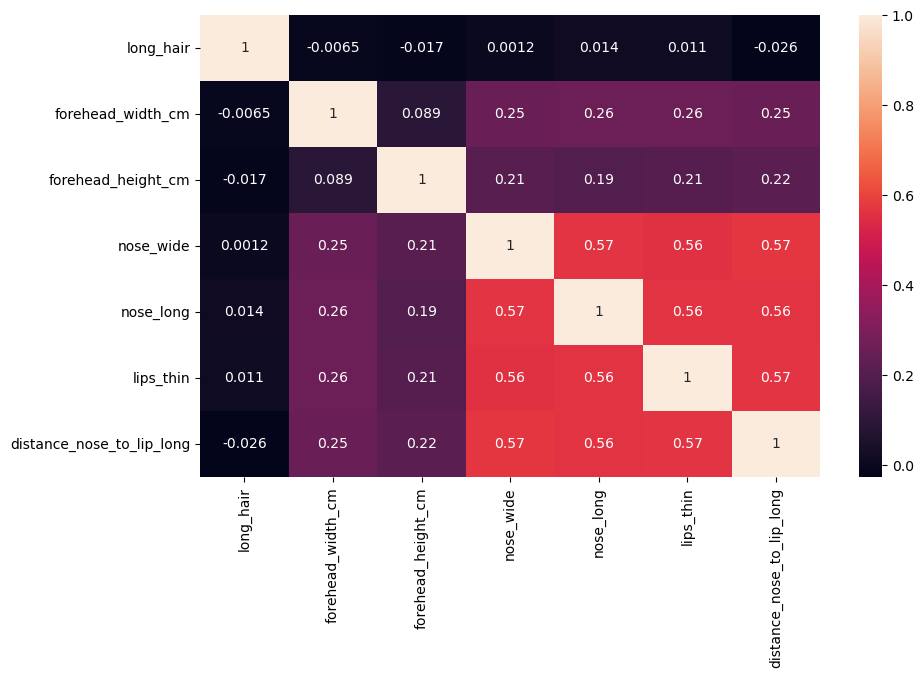

In [15]:
#Özelliklerin kendi içindeki korelasyonlarına bakalım.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [16]:
#Şimdi naive bayes algoritmasını kullanarak verilen özelliklerden cinsiyet tahmini yapmaya çalışalım.
#Verilerimizde süreklilik olduğu için Gaussian Naive Bayes'i kullanacagiz.
#Öncelikle verilerimizi hazırlayalım.
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('gender',axis=1)
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [18]:
#Şimdi verilerimizi normalize edelim.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
gnb = GaussianNB()

In [23]:
gnb.fit(X_train,y_train)

GaussianNB()

In [24]:
pred = gnb.predict(X_test)

In [28]:
#Şimdi modelimizi değerlendirelim.
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
confusion_matrix(y_test,pred)

array([[802,  20],
       [ 21, 808]], dtype=int64)

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.98       822
        Male       0.98      0.97      0.98       829

    accuracy                           0.98      1651
   macro avg       0.98      0.98      0.98      1651
weighted avg       0.98      0.98      0.98      1651

